## Classification for Heart Disease Dataset

## Importing the libraries

Installing required libraries

In [235]:
!pip3 install numpy
!pip3 install matplotlib    
!pip3 install pandas
!pip3 install sklearn
!pip3 install scikit-learn
!pip3 install seaborn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Importing the libraries

In [237]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

## Importing the dataset

In [238]:
dataset = pd.read_csv('Data.csv')

In [239]:
len(dataset)

1319

In [240]:
dataset.head()

,age,impulse,gender,pressurehight,pressurelow,glucose,CK-MB,troponin,class
0,64.0,66.0,Male,160,83,160,1.80,0.012,negative
1,21.0,94.0,Male,98,46,296,6.75,1.060,positive
2,55.0,64.0,Male,160,77,270,1.99,0.003,negative
3,64.0,70.0,Male,120,55,270,13.87,0.122,positive
4,55.0,64.0,Male,112,65,300,1.08,0.003,negative


In [241]:
dataset.describe()

,age,impulse,pressurehight,pressurelow,glucose,CK-MB,troponin
count,1314.000000,1313.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.192542,76.134806,127.170584,72.269143,146.634572,15.274306,0.360942
std,13.673271,15.347676,26.122720,14.033924,74.923349,46.327083,1.154568
min,14.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,135.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [242]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1314 non-null   float64
 1   impulse        1313 non-null   float64
 2   gender         1302 non-null   object 
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   int64  
 6   CK-MB          1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 92.9+ KB


In [243]:
dataset.dtypes

age              float64
impulse          float64
gender            object
pressurehight      int64
pressurelow        int64
glucose            int64
CK-MB            float64
troponin         float64
class             object
dtype: object

In [244]:
dataset.isnull().sum()

age               5
impulse           6
gender           17
pressurehight     0
pressurelow       0
glucose           0
CK-MB             0
troponin          0
class             0
dtype: int64

In [245]:
dataset.isnull().any()

age               True
impulse           True
gender            True
pressurehight    False
pressurelow      False
glucose          False
CK-MB            False
troponin         False
class            False
dtype: bool

Specifying dependent and independent columns

In [ ]:
#independent
X = dataset.iloc[:, :-1].values

#dependent
y = dataset.iloc[:, -1].values
print(X)
print(y)

## Preprocessing

Taking care of missing categorial values

In [246]:
mode_value = dataset['gender'].mode()[0]
dataset['gender'].fillna(mode_value, inplace=True)
dataset.isnull().any()

age               True
impulse           True
gender           False
pressurehight    False
pressurelow      False
glucose          False
CK-MB            False
troponin         False
class            False
dtype: bool

Taking care of missing numeric values

In [248]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 0:2])
X[:, 0:2] = imputer.transform(X[:, 0:2])
X

array([[64.0, 66.0, 'Male', ..., 160, 1.8, 0.012],
       [21.0, 94.0, 'Male', ..., 296, 6.75, 1.06],
       [55.0, 64.0, 'Male', ..., 270, 1.99, 0.003],
       ...,
       [45.0, 85.0, 'Male', ..., 96, 1.24, 4.25],
       [54.0, 58.0, 'Male', ..., 443, 5.8, 0.359],
       [51.0, 94.0, 'Male', ..., 134, 50.89, 1.77]], dtype=object)

Encoding Gender Column

In [249]:
le_gender = LabelEncoder()
X[:, 2] = le_gender.fit_transform(X[:, 2])
X_encoded = X
X_encoded

array([[64.0, 66.0, 1, ..., 160, 1.8, 0.012],
       [21.0, 94.0, 1, ..., 296, 6.75, 1.06],
       [55.0, 64.0, 1, ..., 270, 1.99, 0.003],
       ...,
       [45.0, 85.0, 1, ..., 96, 1.24, 4.25],
       [54.0, 58.0, 1, ..., 443, 5.8, 0.359],
       [51.0, 94.0, 1, ..., 134, 50.89, 1.77]], dtype=object)

Scaling

Text(0, 0.5, 'Years of Experience')

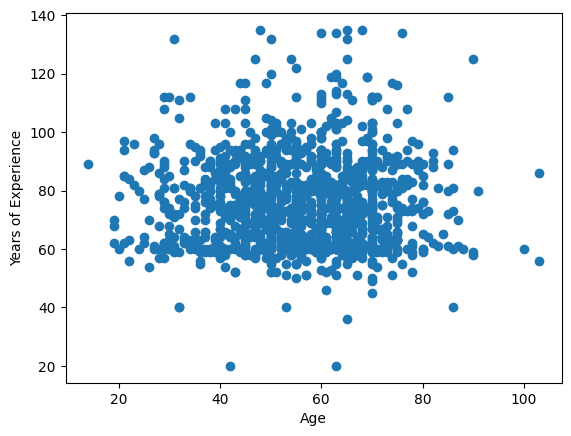

In [250]:
# Identifying scaling problem visually
fig = plt.scatter(dataset.age, dataset.impulse)
plt.xlabel('Age')
plt.ylabel('Years of Experience')

Text(0, 0.5, 'pressurelow')

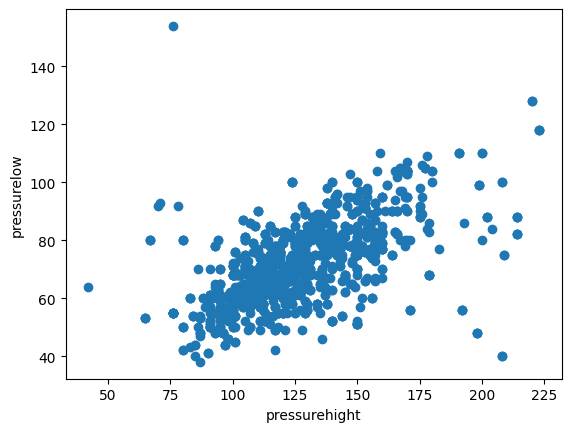

In [264]:
fig = plt.scatter(dataset.pressurehight, dataset.pressurelow)
plt.xlabel('pressurehight')
plt.ylabel('pressurelow')

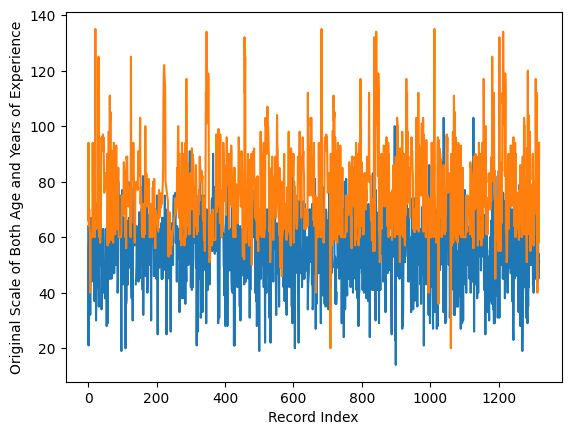

In [251]:
plt.plot(dataset.age)
plt.plot(dataset.impulse)
plt.xlabel('Record Index')
plt.ylabel('Original Scale of Both Age and Years of Experience')
plt.show()

In [252]:
# Standard Scaling
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X_encoded)
X_standard_scaled

array([[ 5.72304670e-01, -6.62107146e-01,  7.17182906e-01, ...,
         1.78455687e-01, -2.90961900e-01, -3.02342376e-01],
       [-2.57969440e+00,  1.16713364e+00,  7.17182906e-01, ...,
         1.99433265e+00, -1.84072428e-01,  6.05700979e-01],
       [-8.74160657e-02, -7.92767202e-01,  7.17182906e-01, ...,
         1.64717970e+00, -2.86859072e-01, -3.10140458e-01],
       ...,
       [-8.20439105e-01,  5.79163386e-01,  7.17182906e-01, ...,
        -6.76074648e-01, -3.03054447e-01,  3.36968791e+00],
       [-1.60718370e-01, -1.18474737e+00,  7.17182906e-01, ...,
         3.95708201e+00, -2.04586569e-01, -1.68298262e-03],
       [-3.80625281e-01,  1.16713364e+00,  7.17182906e-01, ...,
        -1.68697262e-01,  7.69079350e-01,  1.22088302e+00]])

Text(0, 0.5, 'StandardScaler Scale w/o outlier')

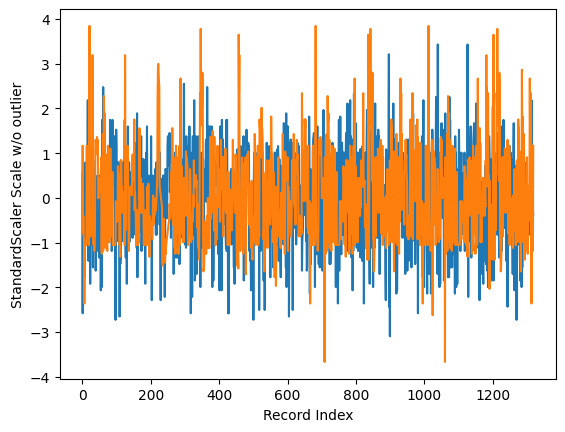

In [266]:
sc_df = pd.DataFrame(X_standard_scaled[:, :2], columns =['age', 'impulse'])
plt.plot(sc_df['age'])
plt.plot(sc_df['impulse'])
plt.xlabel('Record Index')
plt.ylabel('StandardScaler Scale w/o outlier')

In [254]:
# Robust Scaling
robust_scaler = RobustScaler()
X_robust_scaled = robust_scaler.fit_transform(X_encoded)
X_robust_scaled

array([[ 3.33333333e-01, -3.80952381e-01,  0.00000000e+00, ...,
         6.15384615e-01, -2.53012048e-01, -2.51572327e-02],
       [-2.05555556e+00,  9.52380952e-01,  0.00000000e+00, ...,
         2.51748252e+00,  9.39759036e-01,  1.31572327e+01],
       [-1.66666667e-01, -4.76190476e-01,  0.00000000e+00, ...,
         2.15384615e+00, -2.07228916e-01, -1.38364780e-01],
       ...,
       [-7.22222222e-01,  5.23809524e-01,  0.00000000e+00, ...,
        -2.79720280e-01, -3.87951807e-01,  5.32830189e+01],
       [-2.22222222e-01, -7.61904762e-01,  0.00000000e+00, ...,
         4.57342657e+00,  7.10843373e-01,  4.33962264e+00],
       [-3.88888889e-01,  9.52380952e-01,  0.00000000e+00, ...,
         2.51748252e-01,  1.15759036e+01,  2.20880503e+01]])

Text(0, 0.5, 'RobustScaler Scale w/o outlier')

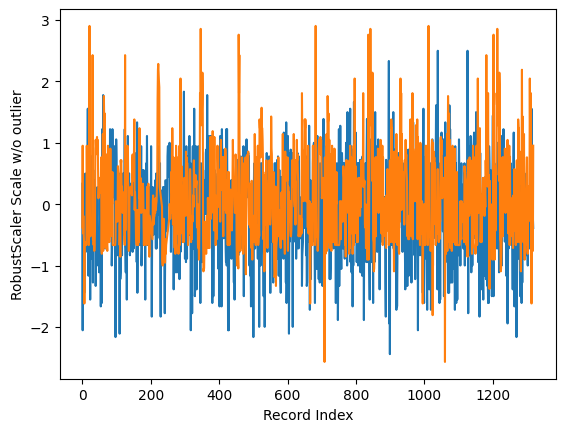

In [255]:
rs_df = pd.DataFrame(X_robust_scaled[:, :2], columns =['age', 'impulse'])
plt.plot(rs_df['age'])
plt.plot(rs_df['impulse'])
plt.xlabel('Record Index')
plt.ylabel('RobustScaler Scale w/o outlier')

Split the dataset into training and testing sets

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X_robust_scaled, y, test_size=0.2, random_state=0)

print('X_train shape => ', X_train.shape)
print('y_train shape => ', y_train.shape)
print('X_test shape => ', X_test.shape)
print('y_test shape =>', y_test.shape)

X_train shape =>  (1055, 8)
y_train shape =>  (1055,)
X_test shape =>  (264, 8)
y_test shape => (264,)


In [257]:
print(X_train[:, 1].min())
print(X_train[:, 1].max())

-2.5714285714285716
2.9047619047619047


## Training the model

Traning using KNN

In [258]:
classifier = KNeighborsClassifier(n_neighbors = 17, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

## Testing the model

Predicted results Vs. Actual (Testing) results

In [259]:
print("Prdecting Vs. Actual")
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

Prdecting Vs. Actual
[['positive' 'negative']
 ['negative' 'positive']
 ['negative' 'positive']
 ['negative' 'negative']
 ['negative' 'negative']
 ['negative' 'negative']
 ['negative' 'positive']
 ['positive' 'positive']
 ['negative' 'negative']
 ['negative' 'negative']
 ['negative' 'negative']
 ['negative' 'negative']
 ['positive' 'positive']
 ['negative' 'negative']
 ['negative' 'negative']
 ['positive' 'positive']
 ['positive' 'positive']
 ['negative' 'negative']
 ['negative' 'negative']
 ['negative' 'negative']
 ['negative' 'negative']
 ['negative' 'negative']
 ['negative' 'negative']
 ['negative' 'negative']
 ['negative' 'negative']
 ['negative' 'negative']
 ['positive' 'positive']
 ['positive' 'positive']
 ['negative' 'negative']
 ['positive' 'positive']
 ['negative' 'negative']
 ['positive' 'positive']
 ['negative' 'positive']
 ['positive' 'positive']
 ['positive' 'positive']
 ['positive' 'positive']
 ['positive' 'positive']
 ['negative' 'negative']
 ['positive' 'positive']
 ['p

## Predicting the output of a new value

In [260]:
new_data_points = np.array([[50, 63, "Male", 160, 72, 100, 0.7, 0.004],
                            [60, 77, "Female", 160, 50, 150, 2.7, 1.03]])

new_data_points[:, 2] = le_gender.transform(new_data_points[:, 2])

new_data_points_scaled = robust_scaler.transform(new_data_points)
predictions = classifier.predict(new_data_points_scaled)

print(f"First data point: {predictions[0]}")
print(f"Second data point: {predictions[1]}")

First data point: negative
Second data point: positive


## Evaluating the model

Confusion Matrix

In [261]:
conf_matrix  = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[103   9]
 [ 32 120]]


Accuracy Score

In [262]:
accuracy_score(y_test, y_pred)

0.8446969696969697

## Visualizing the model

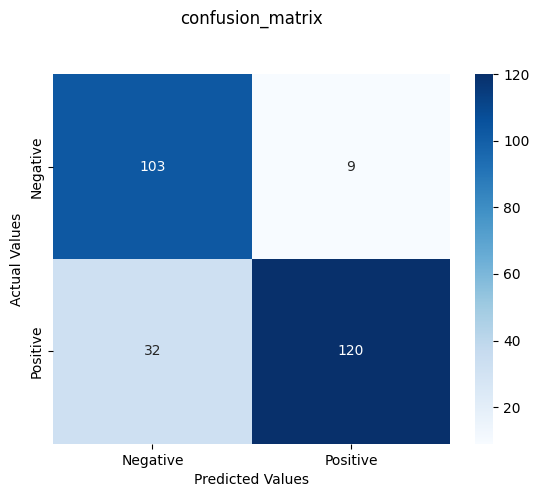

In [263]:
ax = sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues")

ax.set_title('confusion_matrix' + '\n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

plt.show()